In [51]:
import sys
import os

sys.path.insert(0, '/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction')

from tools import *
from config import *

In [52]:
def load_features(filename, path):
    return read_object(filename, path)

method = 'risk-size-watershed'
metric = 'nbsinister-kmeans-5-Class-Dept'

#root = Path('bdiff/firepoint/2x2/train/occurence_bdiff_small/check_z-score')
root = Path('firemen/firepoint/2x2/train/occurence_default/check_z-score')

features = []
for scale in [4,5,6,7, "departement"]:
    if scale == 'departement':
        features_scale = load_features(f'importance_df_{metric}_{scale}.pkl', root / f'full_0_all_{scale}_0_None_node' / 'baseline')
    else:
        features_scale = load_features(f'importance_df_{metric}_{scale}.pkl', root / f'full_0_all_{scale}_0_{method}_node' / 'baseline')
    if features_scale is None:
            continue
    features.append(features_scale)

features = pd.concat(features)

In [53]:
features.replace({'12_min': 'river_height_12h_min', '12_mean': 'river_height_12h_mean', 'AutoRegressionBin-B-1' : 'nbfireDay-1', '12_max': 'river_height_12h_max',
                  'profondeur_nappe_min' : 'groundwater_depht_min', 'profondeur_nappe_max': 'groundwater_depht_max', 'niveau_nappe_eau_max' : 'groundwater_heigh_max',
                  'niveau_nappe_eau_min' : 'groundwater_heigh_min', 'profondeur_nappe_mean' :'groundwater_depht_mean'}, inplace=True)

In [54]:
features[['Feature', 'Scale']].values[:, 0]

array(['cluster_encoder', 'rhum_max', 'rhum_min', 'wdir_max', 'Past_risk',
       'wdir16_max', 'PM10', 'PM25', 'wspd16_max', 'dayofyear',
       'wdir_min', 'O3', 'wspd_min', 'angstroem_max', 'wspd_max',
       'wspd16_min', 'NO2', 'rhum16_min', 'nesterov_max',
       'river_height_12h_min', 'days_since_rain_max',
       'sum_rain_last_7_days_max', 'rhum16_max', 'wdir_mean', 'bui_max',
       'wspd_mean', 'wdir16_mean', 'wspd16_mean', 'ffmc_max', 'temp_min',
       'temp16_min', 'river_height_12h_mean', 'kbdi_min', 'kbdi_max',
       'days_since_rain_mean', 'wdir16_min', 'dwpt_max',
       'river_height_12h_max', 'nesterov_min', 'dwpt_min', 'dc_min',
       'groundwater_depht_min', 'sum_rain_last_7_days_min', 'dwpt16_min',
       'munger_max', 'dwpt16_max', 'days_since_rain_min', 'dc_max',
       'calendar_sum', 'groundwater_depht_mean', 'prec24h16_max',
       'calendar_mean', 'id_encoder_mean', 'groundwater_heigh_max',
       'prec24h_max', 'calendar_max', 'groundwater_depht_max',
 

/tmp/ipykernel_307241/174457386.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_307241/174457386.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_307241/174457386.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_307241/174457386.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_307241/174457386.py:44: FutureWarning

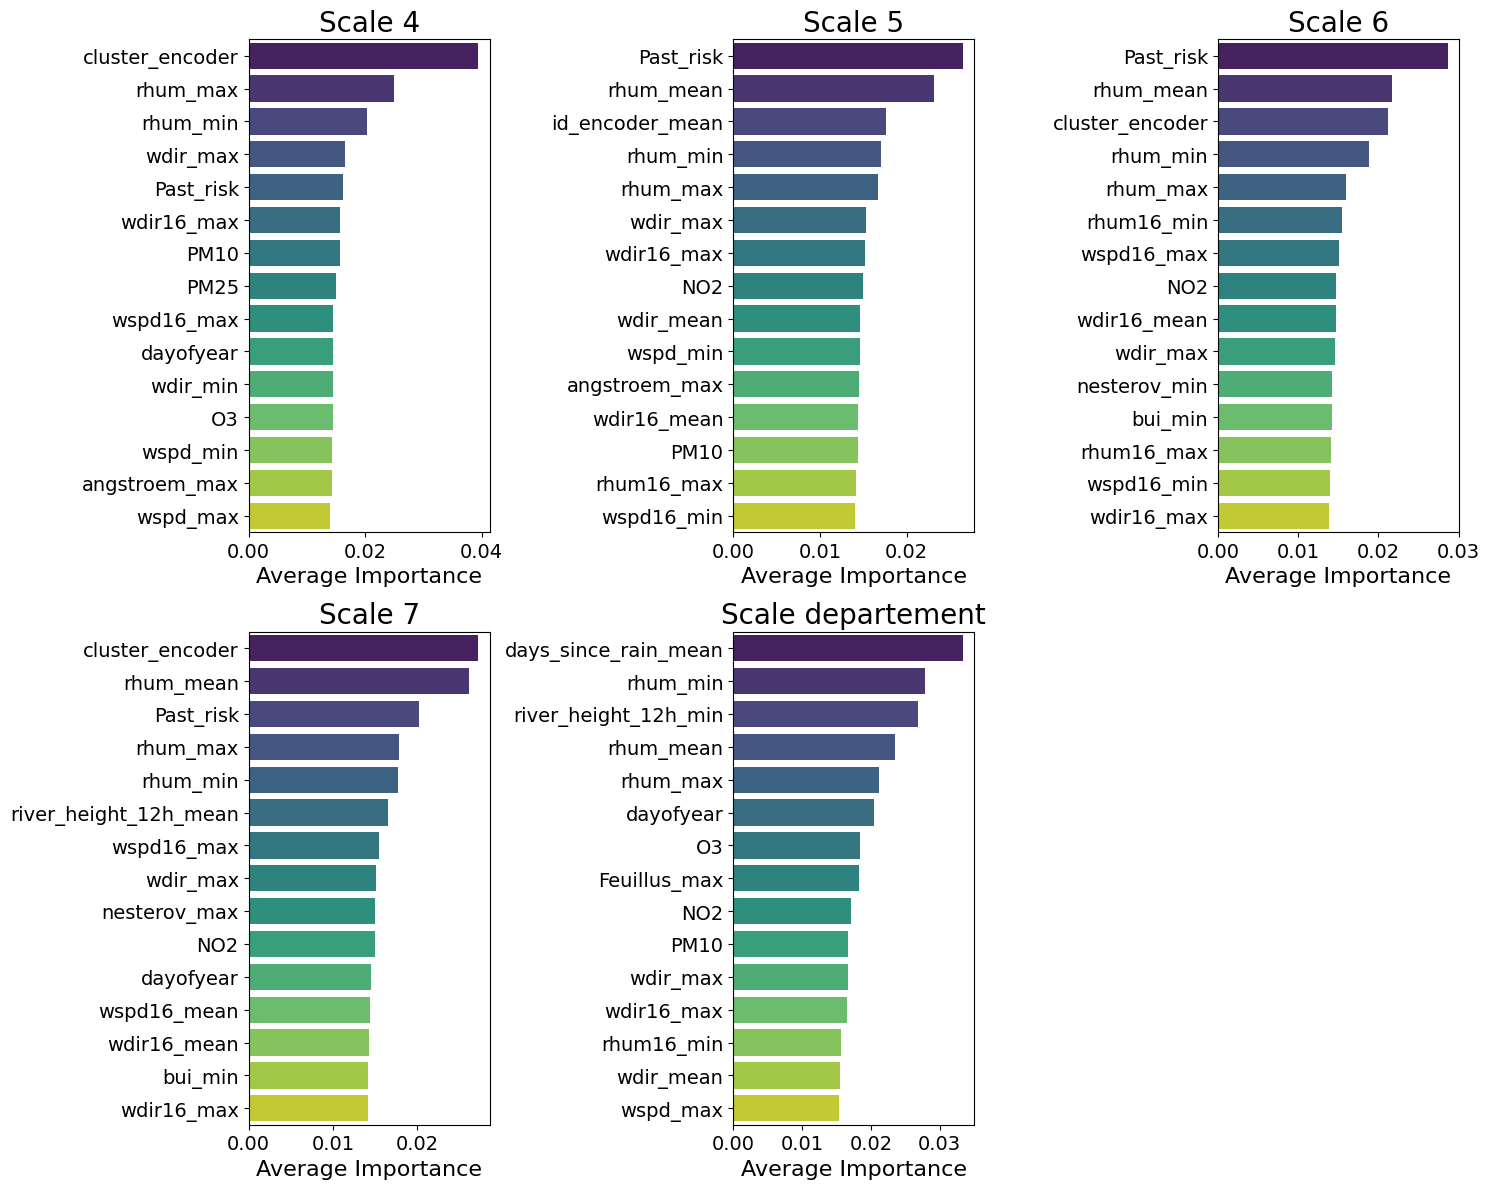

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_top_features_by_scale(df, x):
    """
    Plot the top x features by 'Average Importance' for each unique 'Scale' in the dataframe,
    displayed in a grid of 3 columns and 2 rows.
    
    Parameters:
    df (pd.DataFrame): A dataframe with columns ['Feature', 'Average Importance', 'Scale'].
    x (int): The number of top features to plot for each scale.
    """
    # Ensure the input dataframe contains the required columns
    required_columns = {'Feature', 'Average Importance', 'Scale'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")
    
    # Get the unique scales
    unique_scales = df['Scale'].unique()
    num_scales = len(unique_scales)
    
    # Define grid layout
    num_columns = 3
    num_rows = math.ceil(num_scales / num_columns)
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    
    # Font size settings
    title_font_size = 20
    label_font_size = 16
    tick_font_size = 14
    
    # Plot for each scale
    for i, scale in enumerate(unique_scales):
        # Filter data for the current scale
        scale_data = df[df['Scale'] == scale]
        
        # Get top x features based on 'Average Importance'
        top_features = scale_data.nlargest(x, 'Average Importance')
        
        # Plot
        sns.barplot(
            data=top_features,
            x='Average Importance',
            y='Feature',
            ax=axes[i],
            palette='viridis'
        )
        axes[i].set_title(f'Scale {scale}', fontsize=title_font_size)
        axes[i].set_xlabel('Average Importance', fontsize=label_font_size)
        axes[i].set_ylabel('', fontsize=label_font_size)
        
        # Set tick font size
        axes[i].tick_params(axis='x', labelsize=tick_font_size)
        axes[i].tick_params(axis='y', labelsize=tick_font_size)
    
    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_top_features_by_scale(features, x=15)


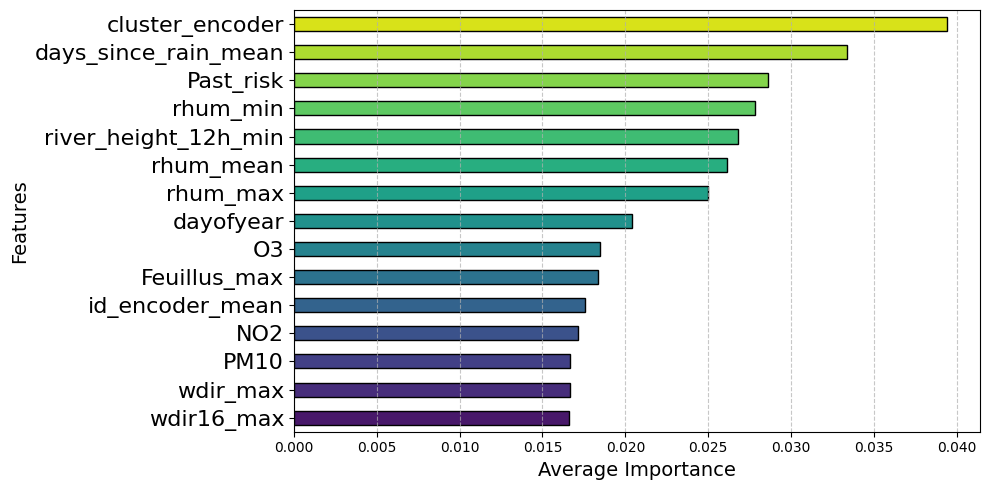

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Pour utiliser les palettes seaborn si nécessaire

def plot_top_features_by_scale(dataframe, x):
    """
    Affiche les 10 Features les plus importantes moyennées par Scale.

    Paramètres :
    - dataframe : DataFrame contenant les colonnes 'Feature', 'Average Importance' et 'Scale'.
    """
    # Vérifier que les colonnes nécessaires existent
    required_columns = {'Feature', 'Average Importance', 'Scale'}
    if not required_columns.issubset(dataframe.columns):
        raise ValueError(f"Le DataFrame doit contenir les colonnes : {required_columns}")
    
    # Calculer l'importance moyenne par Feature et Scale
    averaged_importance = dataframe.groupby(['Scale', 'Feature'])['Average Importance'].mean().reset_index()
    
    # Trouver les Features les plus importantes (somme des importances moyennes)
    top_features = (averaged_importance.groupby('Feature')['Average Importance']
                    .max()
                    .sort_values(ascending=False)
                    .head(x))
    
    # Trier pour l'affichage
    top_features = top_features.sort_values(ascending=True)
    
    # Appliquer une palette de couleurs
    # Utilisation d'une palette seaborn
    palette = sns.color_palette("viridis", len(top_features))  # Vous pouvez changer "viridis" à toute palette seaborn
    
    # Tracer le graphique
    plt.figure(figsize=(10, 5))  # Taille ajustée pour plus de lisibilité
    top_features.plot(kind='barh', color=palette, edgecolor='black')
    
    # Changer la taille de la police pour l'axe des x et y
    plt.xlabel('Average Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    
    # Modifier la taille de la police des ticks de l'axe des y
    plt.yticks(fontsize=16)  # Taille de la police des labels de l'axe des y
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Appeler la fonction
plot_top_features_by_scale(features, 15)

In [57]:
frefz

NameError: name 'frefz' is not defined

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def plot_iou_vs_percentage_with_max(dataframe):
    """
    Plot 'Percentage of 0 sample' on X-axis and normalized 'IoU Score' on Y-axis for each 'Scale',
    and include in the legend the percentage where the maximum IoU is reached.

    Parameters:
    - dataframe: A DataFrame with columns 'Percentage of 0 sample', 'IoU Score', and 'Scale'.
    """
    # Vérifier que les colonnes nécessaires existent
    required_columns = {'Percentage of 0 sample', 'IoU score', 'Scale'}
    if not required_columns.issubset(dataframe.columns):
        raise ValueError(f"The DataFrame must contain the columns: {required_columns}")
    
    # Appliquer une normalisation Min-Max pour chaque Scale
    normalized_data = []
    max_percentage_info = []  # Pour stocker le pourcentage max de chaque scale
    for scale, group in dataframe.groupby('Scale'):
        scaler = MinMaxScaler()
        group['Normalized IoU score'] = scaler.fit_transform(group[['IoU score']])
        normalized_data.append(group)
        
        # Trouver le pourcentage où le IoU Score normalisé est maximal
        max_row = group.loc[group['Normalized IoU score'].idxmax()]
        max_percentage_info.append((scale, max_row['Percentage of 0 sample']))
    
    # Combiner les groupes normalisés
    normalized_df = pd.concat(normalized_data)
    
    # Tracer les données pour chaque Scale
    plt.figure(figsize=(10, 6))
    for scale, group in normalized_df.groupby('Scale'):
        max_percentage = next(item[1] for item in max_percentage_info if item[0] == scale)
        label = f'Scale: {scale} (Max {max_percentage}%)'
        plt.plot(group['Percentage of 0 sample'], group['Normalized IoU score'], label=label, alpha=0.7)
    
    # Configurer le graphique
    #plt.title('IoU Score vs Percentage of 0 Sample (Normalized by Scale)', fontsize=14)
    plt.xlabel('Percentage of 0 Sample', fontsize=12)
    plt.ylabel('Normalized IoU Score', fontsize=12)
    plt.legend(title='Scale', fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

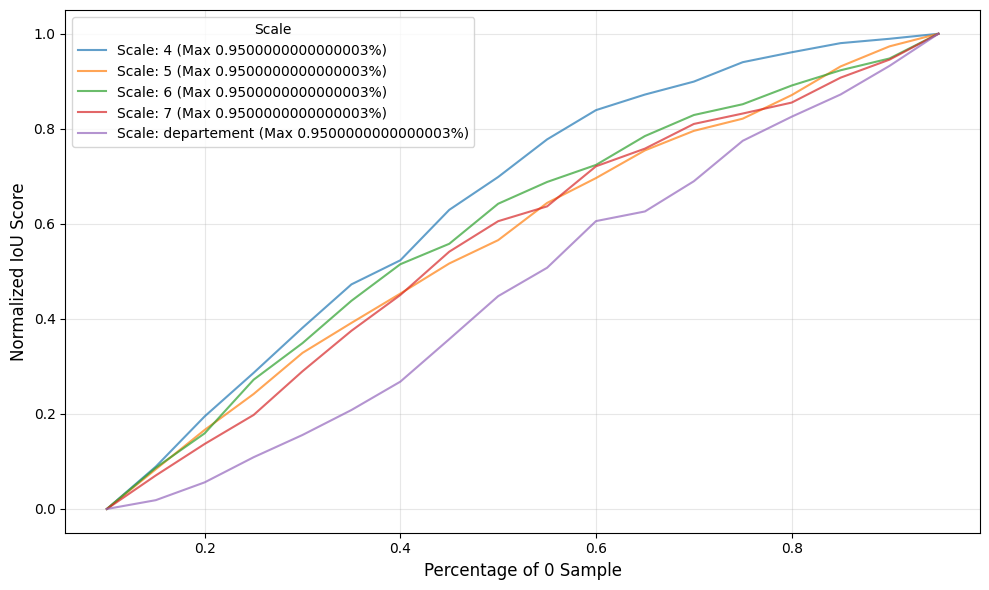

In [38]:
root = Path('firemen/firepoint/2x2/train/occurence_default/check_z-score/')
model = 'xgboost_search_one_nbsinister-kmeans-5-Class-Dept_classification_softmax'
features = []
for scale in [4,5,6,7, "departement"]:
    if scale == 'departement':
        features_scale = load_features(f'test_percentage_scores.pkl', root / f'full_0_all_{scale}_0_None_node/baseline' / model)

    else:
        features_scale = load_features(f'test_percentage_scores.pkl', root / f'full_0_all_{scale}_0_risk-size-watershed_node' / 'baseline' / model)
    
    dico = {}
    dico['Percentage of 0 sample'] = features_scale[0]
    dico['IoU score'] = features_scale[1]
    dico = pd.DataFrame.from_dict(dico)
    dico['Scale'] = scale
    features.append(dico)

features = pd.concat(features)
plot_iou_vs_percentage_with_max(features)

In [39]:
root = Path('firemen/firepoint/2x2/train/occurence_default/check_z-score/')
model = 'xgboost_search_one_nbsinister-kmeans-5-Class-Dept-Specialized_classification_softmax'
features = []
for scale in [4,5,6,7, "departement"]:
    if scale == 'departement':
        features_scale = load_features(f'test_percentage_scores.pkl', root / f'full_0_all_{scale}_0_None_node/baseline' / model)

    else:
        features_scale = load_features(f'test_percentage_scores.pkl', root / f'full_0_all_{scale}_0_risk-size-watershed_node' / 'baseline' / model)
    
    dico = {}
    dico['Percentage of 0 sample'] = features_scale[0]
    dico['IoU score'] = features_scale[1]
    dico = pd.DataFrame.from_dict(dico)
    dico['Scale'] = scale
    features.append(dico)

features = pd.concat(features)
plot_iou_vs_percentage(features)

NameError: name 'logger' is not defined

In [2]:
scale = 4
base = 'risk-size-watershed'
method = 'node'
dico_correlated = read_object(f'{scale}_{base}_{method}_correlated_group.pkl', Path('firemen/firepoint/2x2/train/features_correlation/'))
dico_correlated

{'12_mean': {'12_max'},
 'Bare soil_max': {'Building_max'},
 'cluster_encoder': {'Bare soil_mean',
  'Building_mean',
  'id_encoder_max',
  'id_encoder_mean',
  'id_encoder_min',
  'population_mean'},
 'Châtaignier_mean': {'Châtaignier_max',
  'argile_encoder_max',
  'foret_encoder_max'},
 'Chênes décidus_mean': {'Pin laricio, pin noir_mean', 'Pin sylvestre_mean'},
 'foret_encoder_mean': {'Conifer_max',
  'Conifer_mean',
  'Sapin, épicéa_max',
  'elevation_mean'},
 'Conifères_max': {'Conifères_mean', 'Douglas_mean'},
 'Crop_max': {'Crop_mean'},
 'Shrubland_mean': {'Deciduous_max',
  'Deciduous_mean',
  'Shrubland_max',
  'cosia_encoder_mean'},
 'Hêtre_max': {'Hêtre_mean'},
 'Lawn_max': {'Lawn_mean'},
 'Mixtes_mean': {'Mixtes_max'},
 'Pin autre_max': {'Pins mélangés_max'},
 'elevation_min': {'Sapin, épicéa_mean',
  'niveau_nappe_eau_max',
  'niveau_nappe_eau_mean',
  'niveau_nappe_eau_min'},
 'angstroem_mean': {'angstroem_max', 'angstroem_min'},
 'departement_encoder': {'argile_encoder_

In [2]:
k_days = 7
scale = 30

exp = f'inference/firepoint/2x2/train/default/check_z-score/full_{k_days}_{scale}_700/baseline/'
features = read_object('relevant_features_risk.pkl', path=Path(exp))
features_name, _ = get_features_name_list(scale, train_features)
if k_days > 0:
    for k in range(1, k_days + 1):
            new_fet = [v+'_'+str(k) for v in varying_time_variables]
            train_features += [nf for nf in new_fet if nf.split('_')[0] in train_features]
            features_name, newShape = get_features_name_list(scale, train_features)
log_features(features, features_name)

2024-08-13 14:37:26,518 [INFO ]  inference/firepoint/2x2/train/default/check_z-score/full_7_30_700/baseline/relevant_features_risk.pkl not found


TypeError: get_features_name_list() missing 1 required positional argument: 'methods'

In [1]:
import socket

def get_machine_info():
    try:
        # Obtenir le nom d'hôte de la machine
        hostname = socket.gethostname()
        print(f"Nom de l'hôte : {hostname}")

        # Obtenir l'adresse IP locale
        local_ip = socket.gethostbyname(hostname)
        print(f"Adresse IP locale : {local_ip}")
    except Exception as e:
        print(f"Une erreur est survenue : {e}")

    return hostname


get_machine_info()

Nom de l'hôte : caron-Precision-7780
Adresse IP locale : 127.0.1.1


In [3]:
exp = f'test_geometry/firepoint/2x2/train/2D_database'
departement = 'departement-01-ain'
date = 300
features_name, _ = get_features_name_lists_2D(6, features)
print(allDates[date])
sample = read_object(f'X_{date}.pkl', path=Path(exp) / departement)
sample.shape

2018-04-08


(101, 45, 51)

In [3]:
features_name

['temp',
 'dwpt',
 'rhum',
 'prcp',
 'wdir',
 'wspd',
 'prec24h',
 'dc',
 'ffmc',
 'dmc',
 'nesterov',
 'munger',
 'kbdi',
 'isi',
 'angstroem',
 'bui',
 'fwi',
 'dailySeverityRating',
 'temp16',
 'dwpt16',
 'rhum16',
 'prcp16',
 'wdir16',
 'wspd16',
 'prec24h16',
 'days_since_rain',
 'sum_consecutive_rainfall',
 'sum_rain_last_7_days',
 'sum_snow_last_7_days',
 'snow24h',
 'snow24h16',
 'elevation',
 'population',
 'NDVI',
 'NDMI',
 'NDBI',
 'NDSI',
 'NDWI',
 'highway_encoder',
 'foret_encoder',
 '12',
 'PasDeforet',
 'Châtaignier',
 'Chênes décidus',
 'Conifères',
 'Douglas',
 'Feuillus',
 'Hêtre',
 'Mixte',
 'Mélèze',
 'NC',
 'NR',
 'Peuplier',
 'Pin autre',
 'Pin laricio, pin noir',
 'Pin maritime',
 'Pin sylvestre',
 'Pins mélangés',
 'Robinier',
 'Sapin, épicéa',
 'PasDeRoute',
 'motorway',
 'primary',
 'secondary',
 'tertiary',
 'path',
 'water',
 'tree',
 'grass',
 'crops',
 'shrub',
 'flooded',
 'built',
 'bare',
 'snow',
 'month',
 'dayofyear',
 'dayofweek',
 'isweekend',
 'c

In [7]:
sample.dtype

dtype('float64')

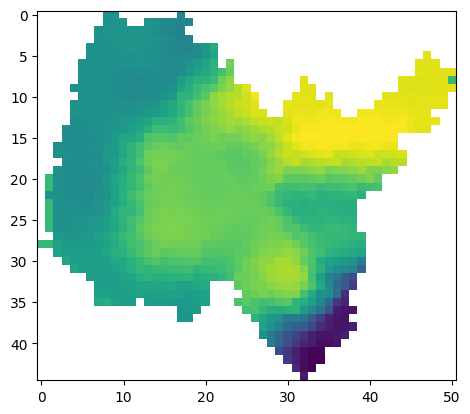

In [6]:
plt.imshow(sample[features_name.index('temp')])

In [ ]:
sample = read_object(f'Y_{date}.pkl', path=Path(exp) / departement/ str(scale) /  'influence')

2017-12-25
2024-08-20 10:11:12,208 [INFO ]  inferene/firepoint/2x2/train/2D_database/departement-01-ain/3/influence/Y_196.pkl not found


TypeError: Image data of dtype object cannot be converted to float

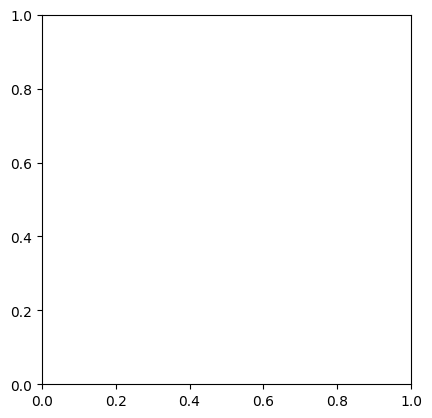

In [5]:
exp = f'inferene/firepoint/2x2/train/2D_database/'
departement = 'departement-01-ain'
scale = 3
date = 196
features_name, _ = get_features_name_lists_2D(6, features)
print(allDates[date])
sample = read_object(f'Y_{date}.pkl', path=Path(exp) / departement/ str(scale) / 'influence')
plt.imshow(sample)